In [ ]:
!pip install spectral -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import numpy as np
import tifffile as tiff
from skimage.transform import rescale
import skimage.color as color
from spectral import imshow

In [ ]:
# Leitura dos arquivos
multi = tiff.imread('/content/drive/MyDrive/Live integração de dados/cut.tif')
VH = tiff.imread('/content/drive/MyDrive/Live integração de dados/VH.tif')

In [ ]:
# Processamento para rescalonamento
rgb = np.empty((multi.shape[0], multi.shape[1], 4))
rgb[:,:,0] = multi[:,:,0] # blue
rgb[:,:,1] = multi[:,:,1] # green
rgb[:,:,2] = multi[:,:,2] # red
rgb[:,:,3] = multi[:,:,3] # IR

rgb_scaled = np.empty((multi.shape[0], multi.shape[1], 4))
#-----------------------------------------------------------
for i in range(4):
  img = rgb[:,:,i]
  scaled = rescale(img, (1,1))
  rgb_scaled[:,:,i] = scaled

#-----------------------------------------------------------
if VH.shape[0] < rgb_scaled.shape[0]:
  rgb_scaled = rgb_scaled[:VH.shape[0],:, :]
else:
  VH = VH[:rgb_scaled.shape[0], :]

if VH.shape[1] < rgb_scaled.shape[1]:
  rgb_scaled = rgb_scaled[:,:VH.shape[1], :]
else:
  VH = VH[:,:rgb_scaled.shape[1]]
#-----------------------------------------------------------
B = rgb_scaled[:,:,0]
G = rgb_scaled[:,:,1]
R = rgb_scaled[:,:,2]
I = rgb_scaled[:,:,3]

In [ ]:
# Função para transformação IHS
def IHS(multi, sar, W=0.1):
  ihs = color.rgb2hsv(rgb_scaled[:,:,:3])
  ihs[:,:,2] = sar - I*W
  image = color.hsv2rgb(ihs)
  return image

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [86.0, 408.0]
    G: [118.0, 338.0]
    B: [153.0, 358.0]

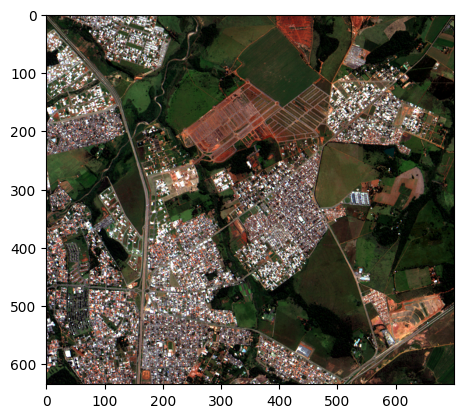

In [ ]:
imshow(multi, bands=(2,1,0), stretch=(0.02))

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-64.54052280970983, -29.02084284966145]
    G: [-71.90435758191485, -29.585814774653826]
    B: [-75.4061264038086, -33.656312463969066]

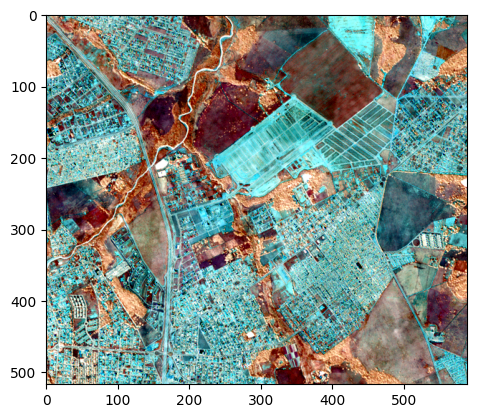

In [ ]:
imshow(IHS(multi, VH), bands=(2,1,0), stretch=(0.02))